# Supervised Learning - Class 6

## Logistic Regression: A simple classification model

### Agenda
1. Introduction to Classification
2. Simple Logistic Regression
    - Understand the logistic equation 
    - Fit a simple logistic regression 
    - Interpret the logisti model coefficients
    - Evaluate the logistic model
3. Example of use-case: Multiple Logistic Regression
4. KNN

## 0. Import Packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

import numpy as np
import pandas as pd
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

np.random.seed(0)

## 1. Example of supervised learning with classification

### Example 1: Disease Diagnosis Clasification with specific biomarkers

Generating synthetic data for illustration

In [3]:
# Generate integer synthetic data
SBP = np.random.randint(80, 160, 100)  # Systolic Blood Pressure in mmHg
TCL = np.random.randint(100, 300, 100)  # Total Cholesterol Level in mg/dL

# Combine the features into a single array
X = np.column_stack((SBP, TCL))

# Generate binary labels based on a threshold condition
y = (SBP + TCL > 300).astype(int)

Plotting the data points pairs (Systolic Blood Pressure -Total Cholesterol Level)

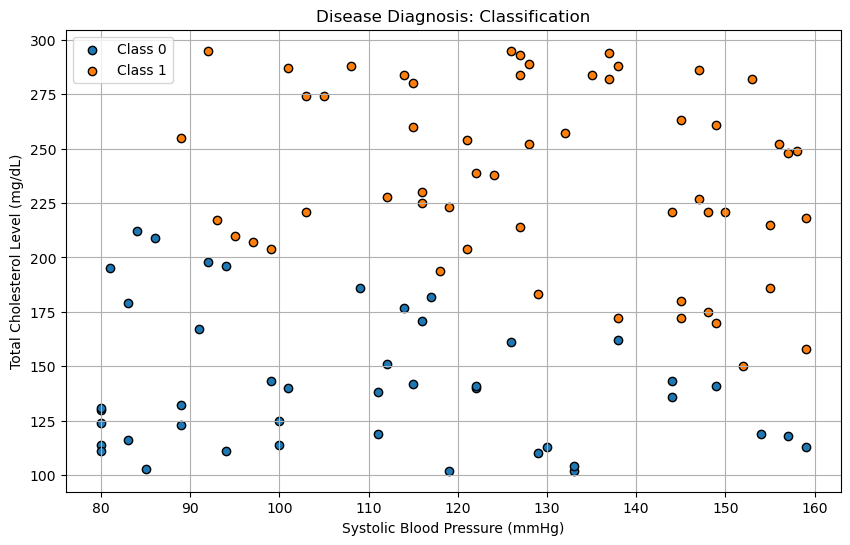

In [4]:
# Plot the synthetic data points
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}', edgecolor='k')

plt.title('Disease Diagnosis: Classification')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Total Cholesterol Level (mg/dL)')
plt.legend()
plt.grid(True)
plt.show()

Adding a decision Boundary

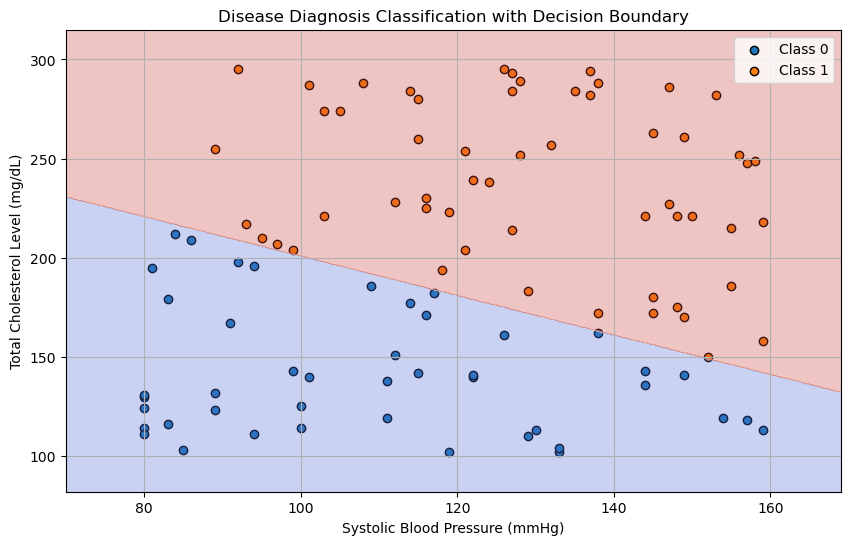

In [5]:
# Plot the synthetic data points with the decision boundary
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}', edgecolor='k')

# Logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Create mesh grid for decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-10, X[:, 0].max()+10, 500),
                     np.linspace(X[:, 1].min()-20, X[:, 1].max()+20, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title('Disease Diagnosis Classification with Decision Boundary')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Total Cholesterol Level (mg/dL)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
model.coef_

array([[0.84548838, 0.84952379]])

In [7]:
model.intercept_

array([-255.10044269])

## 2. Simple Logistic Regression

Logistic regression is a statistical method used for binary classification problems, where the goal is to predict one of two possible outcomes (e.g., presence or absence of disease) based on one or more predictor variables. When using logistic regression with a single variable, we model the probability of the binary outcome as a function of the predictor variable.

### Logistic Regression Equation

The logistic regression model predicts the probability $p$ that the outcome is 1 (e.g., presence of disease) using the following equation:

$$p(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}$$

Where:
- $p(X)$ is the predicted probability of the outcome being 1.
- $X$ is the predictor variable (e.g., pro-BNP levels).
- $\beta_0$ is the intercept of the model (log-odds of the outcome when $X = 0$).
- $\beta_1$ is the coefficient (slope) associated with the predictor variable $X$.


Simple sythetic dataset generated

In [8]:
# Number of data points
n = 200

# Generate synthetic pro-BNP levels
pro_bnp_levels = np.random.randn(n) * 50 + 250  # pro-BNP levels in pg/mL

# Generate binary target variable (1: Heart Failure, 0: No Heart Failure)
threshold = 250  # Threshold for heart failure
heart_failure = (pro_bnp_levels > threshold).astype(int)

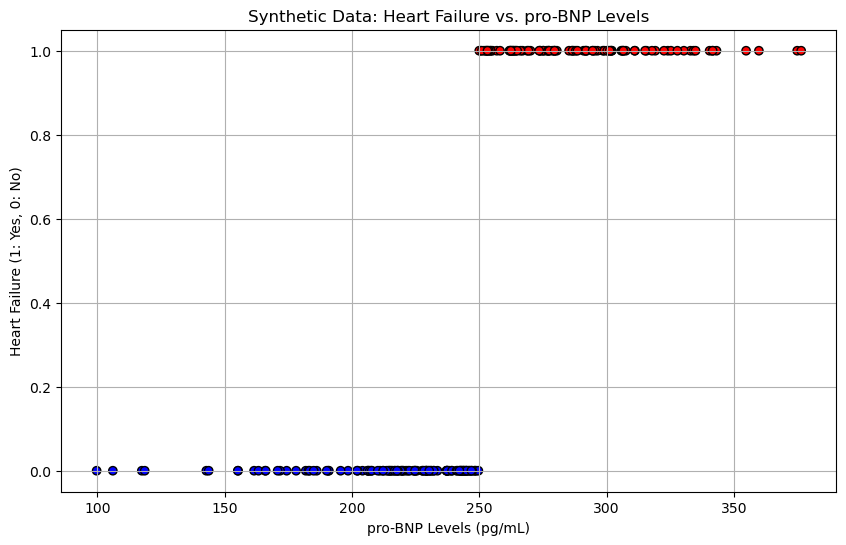

In [9]:
# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(pro_bnp_levels, heart_failure, c=heart_failure, cmap='bwr', edgecolor='k')
plt.xlabel('pro-BNP Levels (pg/mL)')
plt.ylabel('Heart Failure (1: Yes, 0: No)')
plt.title('Synthetic Data: Heart Failure vs. pro-BNP Levels')

plt.grid(True)
plt.show()

In [10]:
# Reshape the data for sklearn (necessary for fitting the model)
X = pro_bnp_levels.reshape(-1, 1)  # Reshape to 2D array with one feature
y = heart_failure

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [11]:
# Generate a range of pro-BNP levels for plotting the sigmoid function
xx = np.linspace(pro_bnp_levels.min()-10, pro_bnp_levels.max()+10, 500).reshape(-1, 1)
yy = model.predict_proba(xx)[:, 1]  # Probability of heart failure

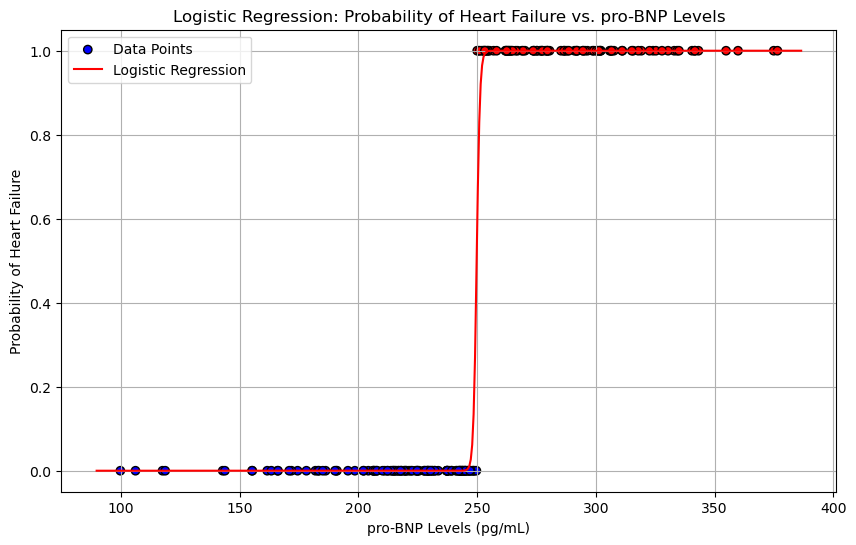

In [12]:
# Plot the sigmoid function and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(pro_bnp_levels, heart_failure, c=heart_failure, cmap='bwr', edgecolor='k', label='Data Points')
plt.plot(xx, yy, color='red', label='Logistic Regression')
plt.xlabel('pro-BNP Levels (pg/mL)')
plt.ylabel('Probability of Heart Failure')
plt.title('Logistic Regression: Probability of Heart Failure vs. pro-BNP Levels')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Print coefficients
print(f"Coefficient (slope): {model.coef_[0][0]}")
print(f"Intercept (log odds at pro-BNP level = 0): {model.intercept_[0]}")

Coefficient (slope): 1.4500274292483033
Intercept (log odds at pro-BNP level = 0): -362.1960862472988


### Understanding Log-Odds

**Definition**

The log-odds, also known as the logarithm of the odds, is the natural logarithm of the odds ratio. It quantifies the likelihood or probability of the event (e.g., heart failure) occurring relative to the likelihood of it not occurring.

**Linear Relationship**

In logistic regression, the log-odds of the outcome $\text{log-odds}(p)$ are modeled as a linear function of the predictor variables $X$:

$$\text{log-odds}(p) = \beta_0 + \beta_1 X_1$$

- $\beta_0$ is the intercept term, representing the log-odds when all predictor variables are zero.
- $beta_1$ is the coefficient (slope) associated with each predictor variable \( X_1$.

**Interpreting Log-Odds**

- A positive log-odds value indicates a higher probability of the event occurring.
- A negative log-odds value indicates a lower probability of the event occurring.
- The magnitude of the log-odds represents the strength of the relationship between the predictor variables and the probability of the outcome.

Logistic regression models use the log-odds to predict the probability of the event using the sigmoid function, which maps the log-odds to a probability value between 0 and 1.


## 3. Example use-case: multiple logistic regression 

**Dataset: Pima Indians Diabetes Database**

Data source and documentation [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download&select=diabetes.csv)

Data summary:
| **Column**                 | **Description**                                                        |
|----------------------------|------------------------------------------------------------------------|
| **Pregnancies**            | Number of times pregnant                                               |
| **Glucose**                | Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| **BloodPressure**          | Diastolic blood pressure (mm Hg)                                       |
| **SkinThickness**          | Triceps skin fold thickness (mm)                                       |
| **Insulin**                | 2-Hour serum insulin (mu U/ml)                                         |
| **BMI**                    | Body mass index (weight in kg/(height in m)^2)                         |
| **DiabetesPedigreeFunction** | Diabetes pedigree function                                           |
| **Age**                    | Age (years)                                                            |
| **Outcome**                | Class variable (0 or 1) 268 of 768 are 1, the others are 0             |


#### Load the data

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Aula%206%20-%20Supervised%20Learning%20II/data/diabetes.csv')

#### Exploratory Data Analysis - EDA

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
data.shape

(768, 9)

In [17]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Correlation matrix between variables

In [18]:
correlation_matrix = data.corr()

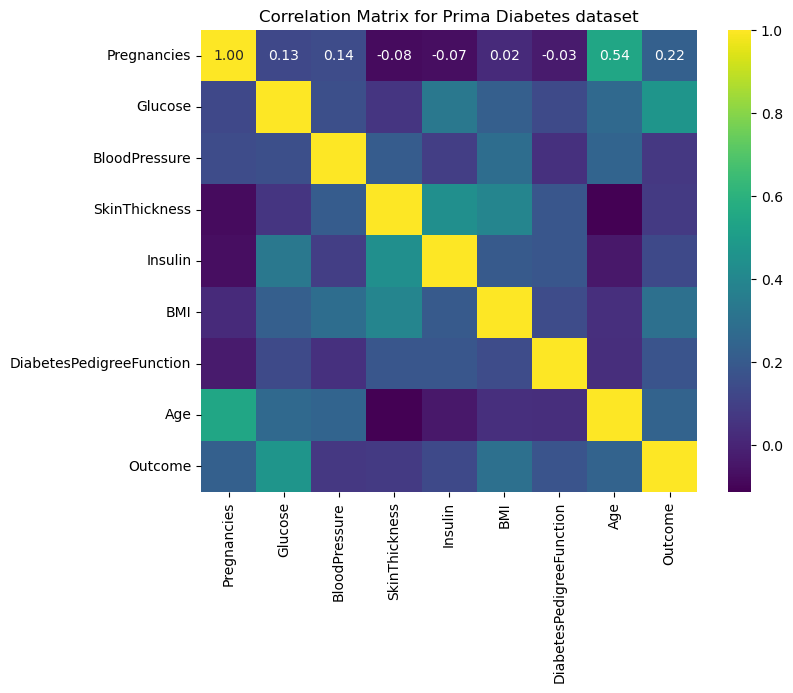

In [19]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap= 'viridis',fmt='.2f')
plt.title('Correlation Matrix for Prima Diabetes dataset')
plt.show()

Boxplots for each variable, separated by the class (Outcome 0 or 1 wether or not a patient has diabetes)

In [20]:
variables = data.drop(columns='Outcome').columns

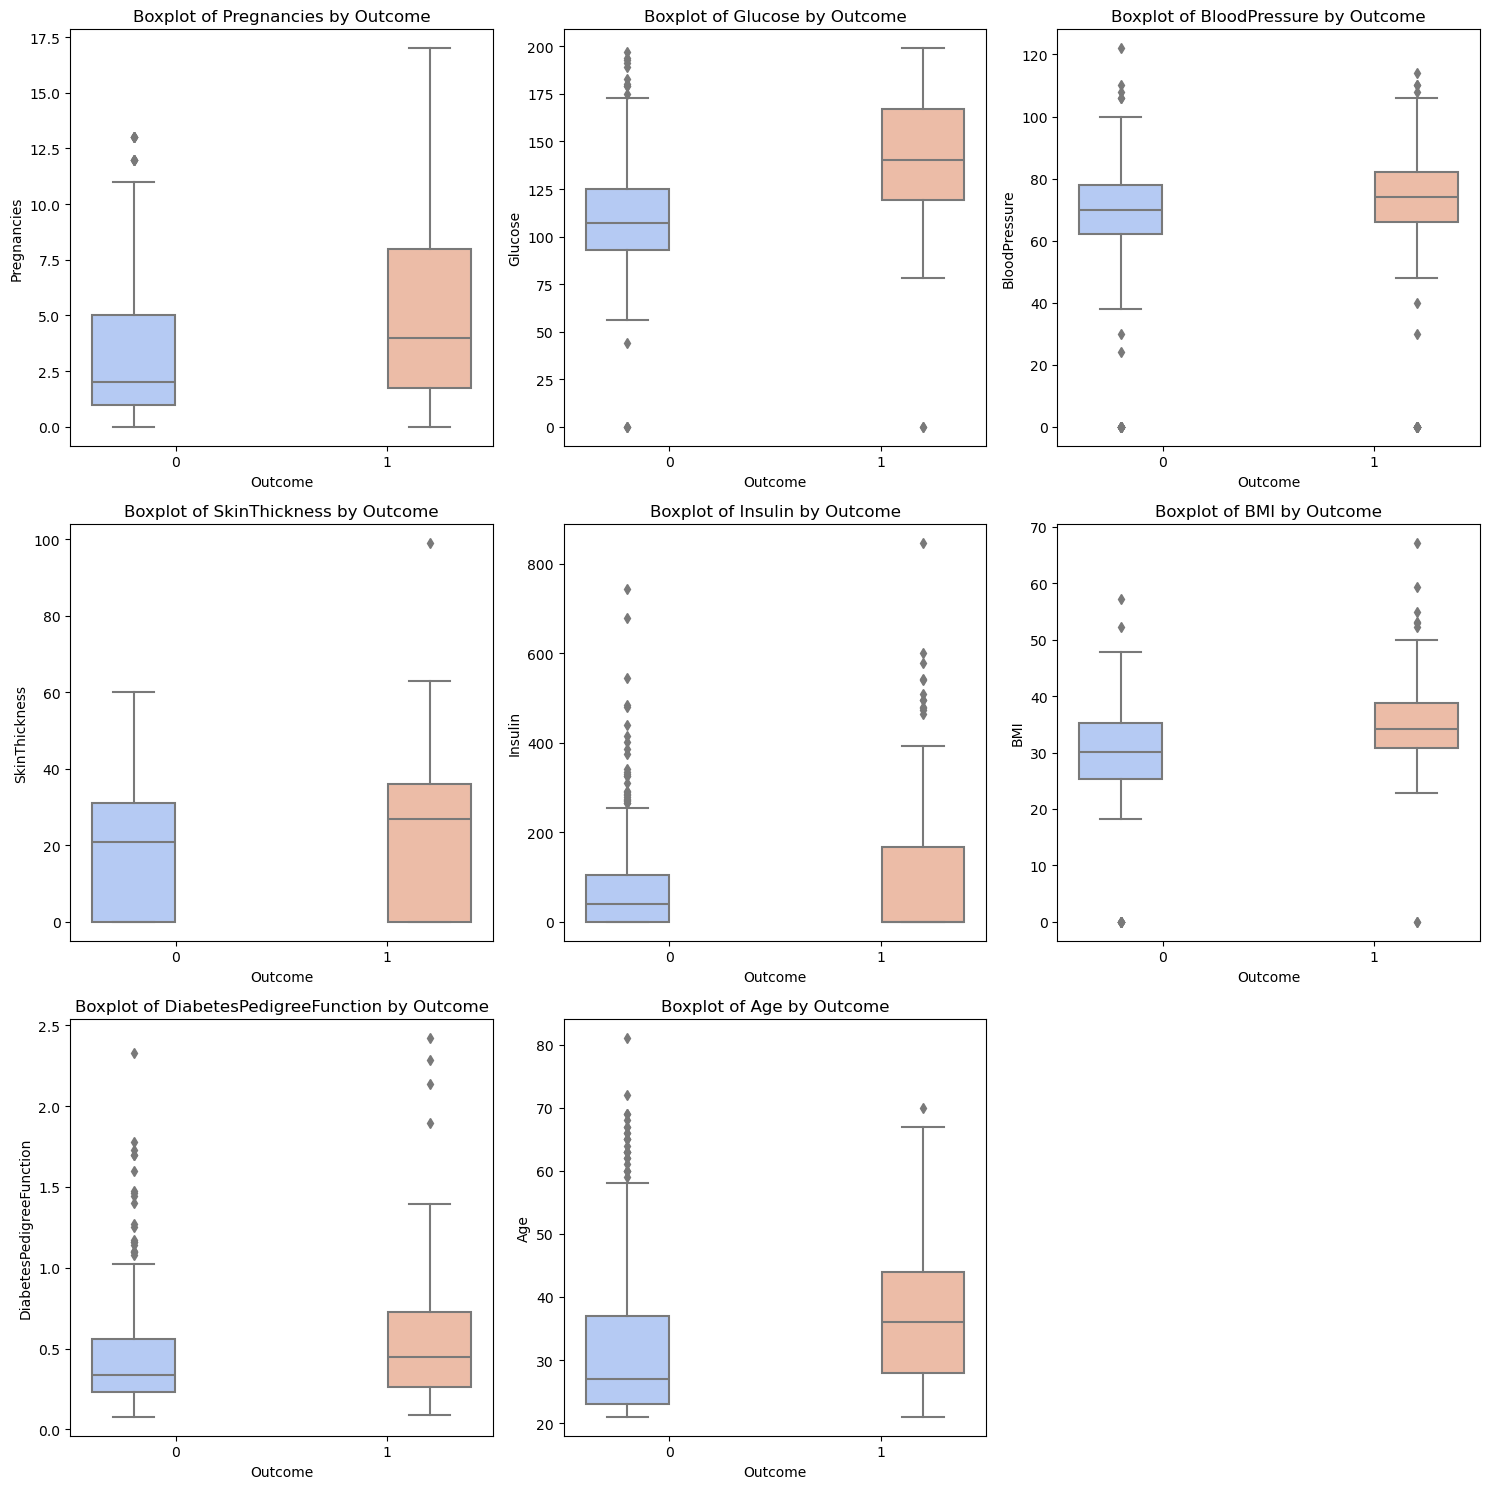

In [21]:
plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=var, data=data, hue='Outcome', palette='coolwarm')
    plt.title(f'Boxplot of {var} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(var)
    plt.legend([],[], frameon=False)  # Remove the legend

plt.tight_layout()
plt.show()

#### Logistic Regression

Select X and y data

In [22]:
X = data.drop('Outcome', axis=1)  # Independent variables
y = data['Outcome']  # Dependent variable (target)

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [24]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Train and Test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# Checking the shapes to get an understanding of the problem
print( X_train.shape, X_test.shape )
print( y_train.shape, y_test.shape )

(614, 8) (154, 8)
(614,) (154,)


Standardization

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the Model

In [28]:
# Create an instance of LogisticRegression
log_reg = LogisticRegression()  # Increase max_iter if needed

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)

LogisticRegression()

Make predictions

In [29]:
# Make predictions on the test set
y_predict = log_reg.predict(X_test)

In [30]:
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [31]:
y_test.to_numpy()

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

Evaluate the model

In [32]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.82


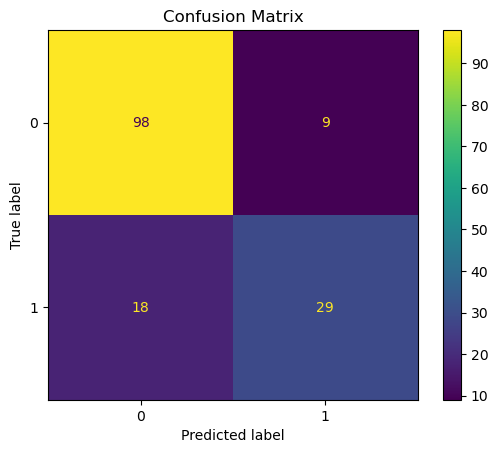

In [33]:
conf_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

**Note:** 

Be caraful!! Sometime the datasets are unbalanced, i.e., the distribution of the classes is not similar

**Strategy 1:** Let the model know, that needs to give more weight to the positive class

In [34]:
y_train.value_counts()

Outcome
0    393
1    221
Name: count, dtype: int64

In [35]:
# Create an instance of LogisticRegression
log_reg_balanced = LogisticRegression(class_weight='balanced')  # Increase max_iter if needed

# Train the Logistic Regression model
log_reg_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [36]:
# Make predictions on the test set
y_predict_bal = log_reg_balanced.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_predict_bal)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.77


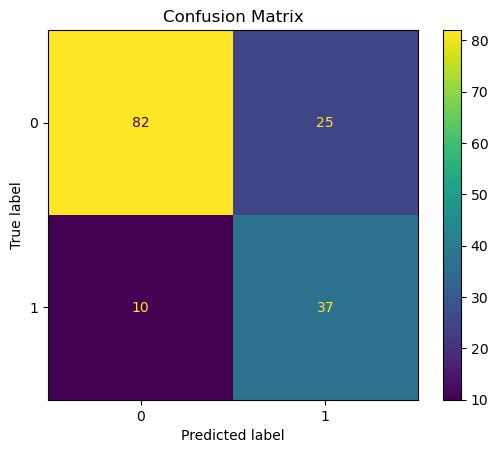

In [38]:
conf_matrix = confusion_matrix(y_test, y_predict_bal)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg_balanced.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

**Strategy 2:** Change the thresholds of the model 

Logistic Regression outputs are probabilities!!

In [39]:
# Make predictions on the test set
y_predict_probs = log_reg.predict_proba(X_test)[:, 1]

In [40]:
# Define a list of thresholds
thresholds = np.arange(0.1, 1.1, 0.1)

# Initialize lists to store results
precisions = []
recalls = []
f1_scores = []

# Calculate metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_predict_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

/anaconda/envs/mlcourse_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
# Create a DataFrame to store results
metrics_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})
metrics_df

,Threshold,Precision,Recall,F1-Score
0,0.1,0.368000,0.978723,0.534884
1,0.2,0.478723,0.957447,0.638298
2,0.3,0.546667,0.872340,0.672131
3,0.4,0.641509,0.723404,0.680000
4,0.5,0.763158,0.617021,0.682353
5,0.6,0.787879,0.553191,0.650000
6,0.7,0.857143,0.382979,0.529412
7,0.8,0.818182,0.191489,0.310345
8,0.9,0.600000,0.063830,0.115385
9,1.0,0.000000,0.000000,0.000000


#### Rules of Thumb for Decision Threshold Adjustment in Healthcare

1. **Evaluate the Cost of Errors**:
   - Assess the clinical and psychological impact of false positives and false negatives for each specific test or model.
   - High cost of false positives (e.g., **invasive procedures**, **anxiety**) -> Higher precision.
   - High cost of false negatives (e.g., **missed diagnoses**, **delayed treatment**) -> Higher recall.

2. **Consider the Prevalence of the Condition**:
   - Rare conditions: High precision is often preferred due to the low base rate.
   - Common conditions: High recall is often preferred to catch as many cases as possible.

3. **Adjust for Context and Use Case**:
   - Screening vs. Diagnostic: Screening tests may prioritize recall to identify potential cases, while diagnostic tests may prioritize precision to confirm a diagnosis.
   - Preventive vs. Reactive: Preventive measures (e.g., vaccinations, regular screenings) may favor high recall, while reactive measures (e.g., treatment plans) may favor high precision.

#### How can we interpret the model coefficients?

**Log-Odds Interpretation:** Each coefficient in model.coef_ represents the effect of a one-unit change in the corresponding predictor variable on the log-odds of the response variable (outcome).

**Intercept:** The intercept (model.intercept_) represents the log-odds of the response variable when all predictor variables are zero.

In [42]:
# Extract coefficients and feature names
coefficients = log_reg.coef_[0]
feature_names = X.columns

In [43]:
coefficients

array([ 0.3099036 ,  1.06033551, -0.26051204,  0.06864717, -0.15813382,
        0.68423718,  0.29359879,  0.23968793])

In [44]:
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

**Ods-ratio:** To convert the coefficients to interpret them as odds ratios (which give a direct interpretation of the change in odds of the outcome), you would exponentiate them.

In [45]:
odds_ratio = np.exp(coefficients)

In [47]:
# Sort coefficients and feature names by absolute odds_ration
sorted_indices = np.argsort(np.abs(odds_ratio))[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_odds = odds_ratio[sorted_indices]

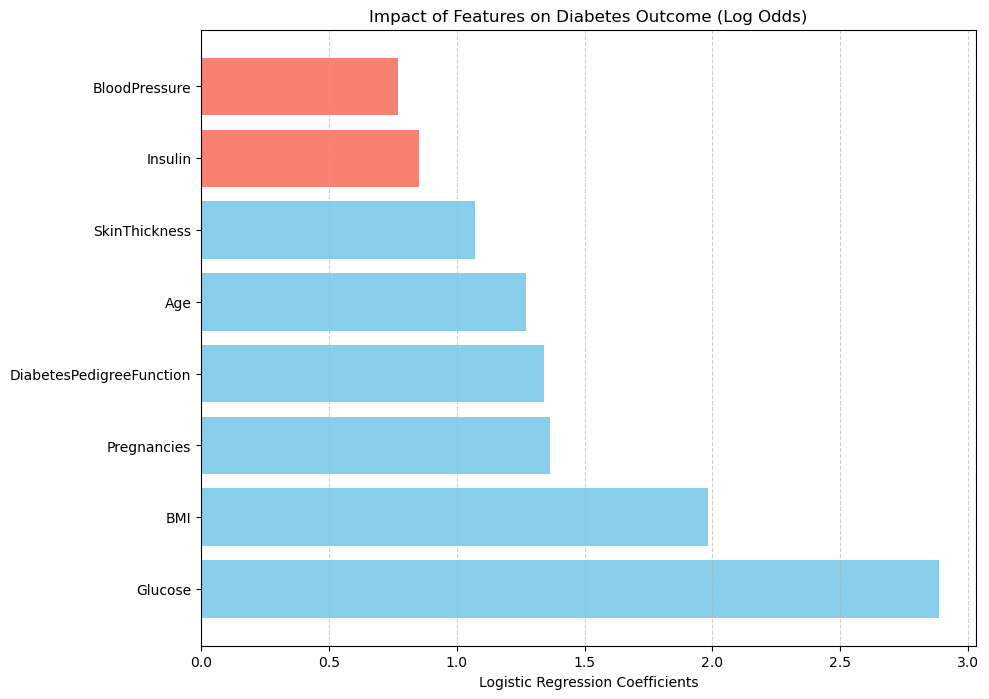

In [48]:
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_odds, color=['skyblue' if coef > 1 else 'salmon' for coef in sorted_odds])
plt.xlabel('Logistic Regression Coefficients')
plt.title('Impact of Features on Diabetes Outcome (Log Odds)')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

**Impact of Odds Ratios:**
1. Odds Ratio = 1:
    - When the odds ratio equals 1, it indicates that there is no association between the predictor variable and the odds of the outcome. In other words, the predictor variable does not affect the odds of the outcome occurring.

2. Odds Ratio > 1:
    - An odds ratio greater than 1 indicates that an increase in the predictor variable is associated with higher odds of the outcome occurring. For example, if the odds ratio for a predictor is 2, it means that as the predictor variable increases by one unit, the odds of the outcome occurring are twice as high compared to when the predictor variable is at its reference level (or zero for continuous variables).

3. Odds Ratio < 1:
    - An odds ratio less than 1 suggests that an increase in the predictor variable is associated with lower odds of the outcome occurring. For instance, if the odds ratio for a predictor is 0.5, it indicates that as the predictor variable increases by one unit, the odds of the outcome occurring are halved compared to when the predictor variable is at its reference level.